# Introducción

Este trabajo se centra en la aplicación de técnicas de encoding y feature engineering para procesar un conjunto de datos de detección de fraude con tarjetas de crédito, con el objetivo de extraer características relevantes que alimentarán un modelo de machine learning. A través de los procesos de Encoding y Feature Engineering buscamos desarrollar un algoritmo capaz de identificar y prevenir eficazmente transacciones fraudulentas, brindando así una mayor seguridad tanto a las instituciones financieras como a los consumidores.

# Resumen

### Contexto y Problemática

 Las operaciones con tarjetas de crédito son cada vez mas frecuentes, no únicamente debido a la incomodidad de manejar efectivo, siendo este ineficiente y mas incómodo para registrar los movimientos, si no tambien debido a la posibilidad que brindan de realizar compras en el exterior. Nos encontramos ante el desafío de detectar qué operaciones de tarjetas de crédito son fraudulentas y separarlas de aquellas que son operaciones normales. 


### Objetivo

 La detección temprana tendrá muchas utilidades, entre ellas notificar rápidamente al usuario en caso de que no esté al tanto para poder bloquear la tarjeta antes de que se realicen mas operaciones, y poder realizar una denuncia, también rápida, que facilite la identificación del responsable. Esto, incluso, podría ser el principio de la creación de una nueva base de datos para establecer en qué modo se clonan las tarjetas, donde, con qué frecuencia, qué compras suelen hacer, etc., para la generación de un nuevo modelo predictivo que establezca la probabilidad de que una tarjeta sea clonada, o los datos robados, al hacer determinadas operaciones.


### Método

 El DataSet actual cuenta con la complejidad de no tener identificadas las variables, es decir que no es posible determinar o suponer si una variable va a estar relacionada o no al fraude por su nombre o definición ya que estos no están disponibles. Contamos con las variables previamente definidas y las 28 "Vi". Considerando esto - 

 1. Se realizarán histogramas de todas las variables individualmente (gráficos univariados) para evaluar si responden a alguna distribución conocida
 
 2. Se realizarán gráficos bivariados de cada una de las variables contra la variable fraude para detectar aquellas que presenten correlación
 
 3. Una vez detectadas las variables que presentan correlación con el fraude se buscará establecer la relación entre ellas respecto a la variable fraude - esto será abordado en entregas futuras

### DataSet 

El conjunto de datos contiene las transacciones realizadas con tarjetas de crédito en septiembre de 2013 por titulares de tarjetas europeas.
Este conjunto de datos presenta las transacciones que ocurrieron en dos días, donde tenemos 492 fraudes de 284,807 transacciones. El conjunto de datos está muy desequilibrado, la clase positiva (fraudes) representa el 0,17% de todas las transacciones.

Contiene sólo variables numéricas de entrada que son el resultado de una transformación PCA. La transformación PCA se utilizó para reducir el DataSet más grande y eliminar los atributos redundantes. Las características V1, V2, ..., V28 son los componentes principales que se obtienen con la transformación PCA, las únicas características que no se han transformado con PCA son 'Tiempo' y 'Cantidad'. 

'Tiempo' contiene los segundos transcurridos entre cada transacción y la primera transacción en el conjunto de datos.
 
'Importe' es el importe de la transacción. Esta función se puede utilizar para, por ejemplo, el aprendizaje sensible a los costos dependientes.
 
'Clase' es la variable de respuesta y toma el valor 1 en caso de fraude y 0 en caso contrario.

In [1]:
# Importo Pandas, Numpy, matplotlib y seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import confusion_matrix
from itertools import product

In [2]:
# Importo el dataset para tener una primera visualización

df1 = pd.read_csv(r"playground-series-s3e4\train.csv")
df1 = df1.drop('id', axis = 1)
df1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,0.742144,...,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0
1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,-0.109948,...,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0
2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,-0.042027,...,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0
3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,0.885838,...,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0
4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,0.692665,...,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219124,120580.0,1.891079,-1.272908,-3.783908,-1.388939,2.012789,2.666080,0.151740,0.401934,-1.102824,...,-0.181369,-0.456538,-0.069571,0.756765,0.244479,-0.147566,-0.054725,-0.044588,198.65,0
219125,120580.0,0.139724,0.948649,-2.913655,-2.184829,1.883716,-1.056824,1.725624,0.018089,-0.823494,...,0.491469,1.478823,-0.085398,-0.091409,-1.053488,0.467570,0.358918,0.294735,24.00,0
219126,120580.0,2.058343,-0.038993,-1.928553,0.330117,0.270127,-0.735664,-0.173878,0.144823,0.849289,...,-0.306640,-0.965783,0.307799,-0.021434,-0.343989,0.181065,-0.098387,-0.044064,1.79,0
219127,120580.0,2.079227,-2.162389,-1.785833,-2.804889,0.552845,4.038013,-2.155900,1.023785,-0.865242,...,0.109909,0.590401,0.286621,0.675660,-0.510736,-0.090044,0.056749,-0.017126,88.00,0


**DESCRIBE** - Como primer paso, buscamos la descripción del data set para entender los rangos en los que se mueven las variables y sus principales caracterísitcas desde un punto de vista estadístico. Esta información podemos obetenerla mediante el método describe

In [3]:
# Creo una descripción del data set para tener un resumen estadístico de las columnas

df1.describe().round(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,219129.00,219129.00,219129.00,219129.00,219129.00,219129.00,219129.00,219129.00,219129.00,219129.00,...,219129.00,219129.00,219129.00,219129.00,219129.00,219129.00,219129.00,219129.00,219129.00,219129.00
mean,62377.42,0.10,0.05,0.59,0.07,-0.16,0.13,-0.13,0.15,-0.05,...,-0.03,-0.05,-0.05,-0.00,0.12,0.01,0.01,0.02,66.36,0.00
std,25620.35,1.40,1.16,1.13,1.25,1.07,1.20,0.82,0.72,1.05,...,0.42,0.60,0.32,0.59,0.41,0.47,0.23,0.16,150.80,0.05
min,0.00,-29.81,-44.25,-19.72,-5.26,-37.59,-25.66,-31.18,-28.90,-8.76,...,-14.69,-8.75,-11.96,-2.84,-3.96,-1.86,-9.23,-4.55,0.00,0.00
25%,47933.00,-0.85,-0.57,-0.03,-0.77,-0.85,-0.63,-0.65,-0.10,-0.71,...,-0.19,-0.47,-0.17,-0.33,-0.13,-0.32,-0.05,-0.01,5.99,0.00
50%,63189.00,0.39,0.05,0.74,0.06,-0.23,-0.09,-0.10,0.11,-0.13,...,-0.04,-0.03,-0.06,0.04,0.15,-0.09,0.02,0.02,21.90,0.00
75%,77519.00,1.19,0.81,1.31,0.92,0.36,0.48,0.39,0.39,0.58,...,0.11,0.35,0.06,0.39,0.40,0.25,0.08,0.07,68.93,0.00
max,120580.00,2.43,16.07,6.15,12.55,34.58,16.23,39.82,18.27,13.42,...,22.06,6.16,12.73,4.57,3.11,3.40,13.12,23.26,7475.00,1.00


**VALORES NULOS** Si bien previamnete, el método info nos permitió ver que no contamos con valores nulos, no podemos determinar que no contemos con valores nan o null. Para buscar estos valores, utilizaremos los métodos *"isna"* e *"isnull"*

In [4]:
pd.DataFrame(df1.isna().sum(), columns = ["NaN Counts"])

,NaN Counts
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [5]:
pd.DataFrame(df1.isnull().sum(), columns = ["Null Counts"])

,Null Counts
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


Podemos, ahora si, descartar las presencias de valores nan y null en el dataset. No teniendo así, que determinar ningún procedimiento para tratar con tales valores.

# Encoding

El proceso de encoding se utiliza para convertir datos de un formato particular en otro formato más adecuado para facilitar su almacenamiento, transmisión o manipulación. Este proceso es esencial para garantizar que los datos se manejen de manera eficiente, asegurando la compatibilidad y la integridad de la información.

En el caso de nuestro dataset, las variables a trabajar son todas numéricas - 
 - Las variables Time y Vi cuentan con 7 cifras significativas
 - La variable Amount cuenta con dos decimales
 - La variable class cuenta con una única cifra significativa (dado que las únicas opciones son 1 o 0)
 
Para poder trabajar las variables en aquellos formatos que sean mas adecuados - 
 - Las variables Time y Vi requerirán del formato "Punto flotante de doble precisión" -  Estos números pueden representar números con hasta aproximadamente 16 dígitos decimales de precisión, lo que es adecuado para trabajar con variables que requieren seis decimales.
 - La variable Amount requerirá el formato "Decimal" - ya que no requiere de tanta precisión como las variables anteriores
 - La variable Class requerirá el formato "Número entero" - ya que únicamente requiere los valores 1 y 0
 
Como primer paso, evaluaré los tipos actuales de las variables y, en caso de ser necesario, serán modificados a los mencionados previamente.

In [6]:
# Obtener los tipos de datos de cada columna en el DataFrame
tipos_de_datos = df1.dtypes

# Imprimir los tipos de datos
print(tipos_de_datos)

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


Considerando que los tipos de datos se ajustan a las necesidades descriptas en el paso anterior, no es necesario realizar ningún cambio.

### Feature Engineering

El proceso de encoding se utiliza para seleccionar, transformar o crear nuevas variables (características) a partir de los datos originales con el objetivo de mejorar el rendimiento de un modelo predictivo.

En el caso de nuestro dataset, la única variable que podríamos transformar sería 'Time' considerando que
 - Las variables Vi no cuentan con definición alguna, por lo cual no tendría sentido realizarle ninguna operación.
 - La variable Amount es el importe de la transacción, por lo cual tampoco tendría sentido realizarle ninguna operación.
 - La variable class es la variable a predecir y toma únicamente el valor 0 o 1, por lo cual tampoco tendría sentido transformarla.
 
Podríamos transformar la variable 'Time' de sengundos a minutos, en caso que fuera necesario, pero no es el caso. 

Como Feature Engineering, realizaremos un proceso de selección de variables en base al modelo a utilizar.
 - Se realizará una evaluación de la correlación entre variables, eliminando según sea necesario las variables que presenten una correlación alta (es decir, cuyo módulo de coeficiente de correlación supere el 0.6).


**CORELACIÓN** - Ahora que hemos evaluado las características del dataset, procedemos a buscar las relaciones entre las variables independientes entre sí, y, la relación de cada una de ellas respecto a la variable dependiente *"Clase"*. 

Para hacer esto, utilizamos una matriz de correlación, y mejoramos su visualización mediante la incorporación de un mapa de calor (*heatmap*).

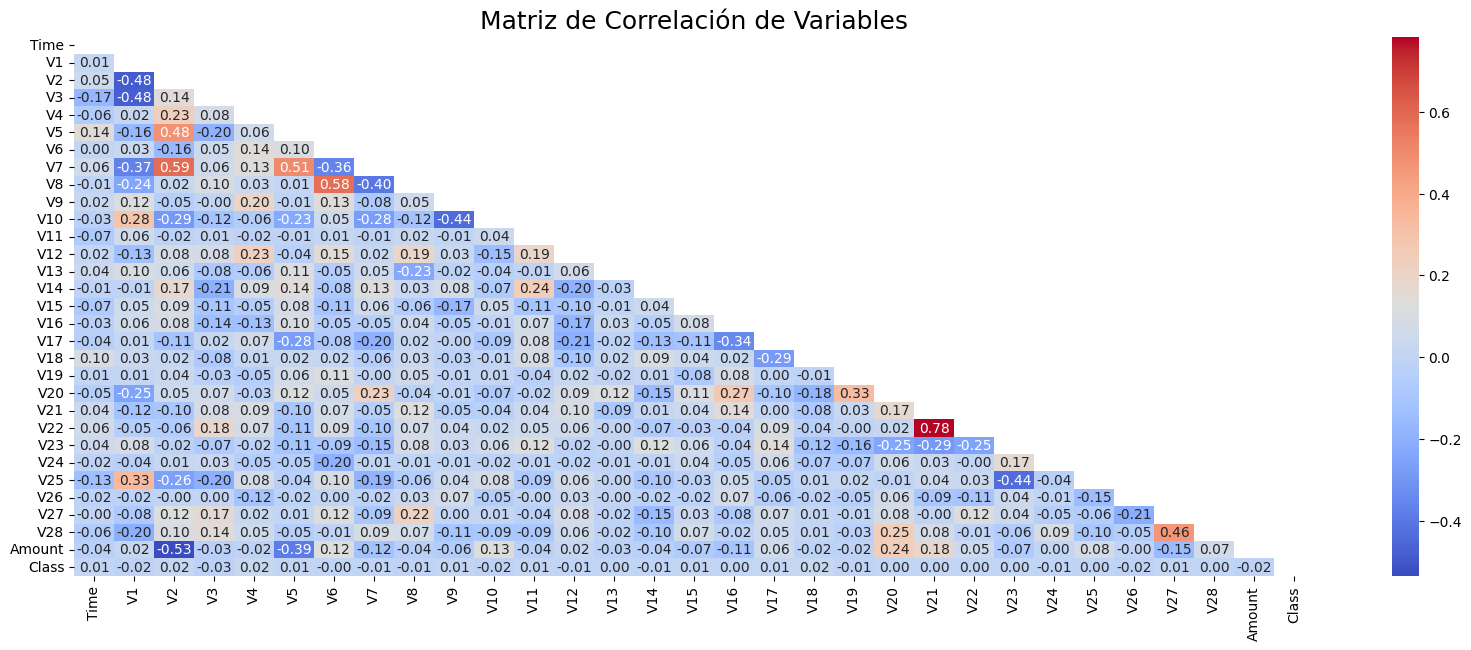

In [7]:
# Creo la matriz de correlacion
correlation_matrix = df1.corr(method='spearman')
mask = np.triu(np.ones_like(correlation_matrix,dtype=bool))

#Ploteo
plt.figure(figsize=(20,7))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", mask=mask)
plt.title('Matriz de Correlación de Variables', size = 18)
plt.show()

La correlacion entre variables es baja, a excepción de las variables V21 y V22 que presentan un grado de 0.78. En caso de, al continuar el análisis, tener que reducir la cantidad de variables a utilizar, se podrá descartar una de estas dos por grado alto de multicolinealidad con la otra.

Respecto a la relación de las variables independientes con la variable dependiente, *"Class"*, y al no poder establecer un modelo de clasificación que dependa de 30 variables, se procederá a hacer una selección de variables, mediante el método *"Forward Feature Selection"*. 

Respecto a la correlación con la variable *"Class"* todas las variables presentan una correlación baja. Es esperable considerando el desbalance que existe entre valores de fraude y no fraude (contamos con menos de 400 valores de fraude en los más de 219 mil registros).

Teniendo esto en consideración, graficaremos las distribuciones de las variables de forma independiente para ver sus distribuciones y relación con la variable *"Class"*.

Consdierando que los histogramas y los gráficos que muestran las relaciones de cada V con la clase no están proporcionando la información deseada, se crean histogramas de los valores de cada V que corresponden a valores de Clase = 1 . Es decir, podremos ver las distribuciones de los valores de V para los cuales hay fraude.

In [8]:
pd.DataFrame(df1.isna().sum(), columns = ["NaN Counts"])

,NaN Counts
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


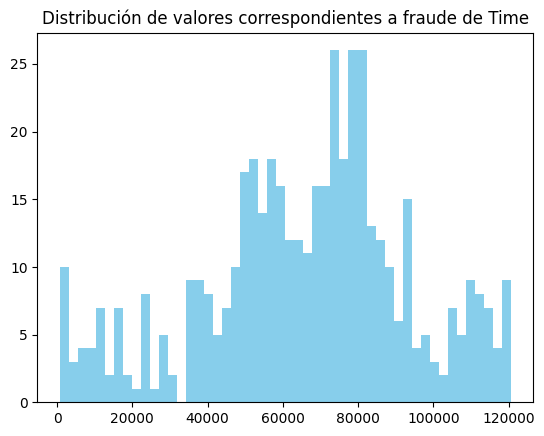

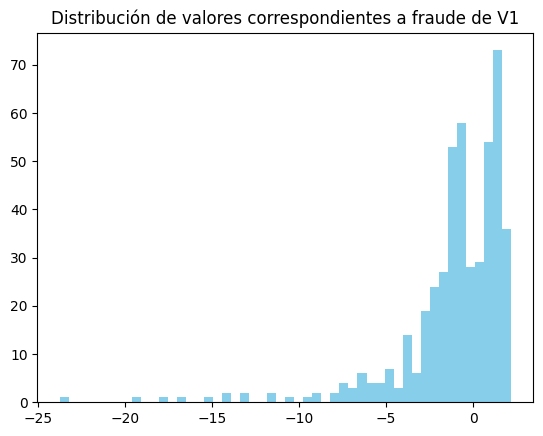

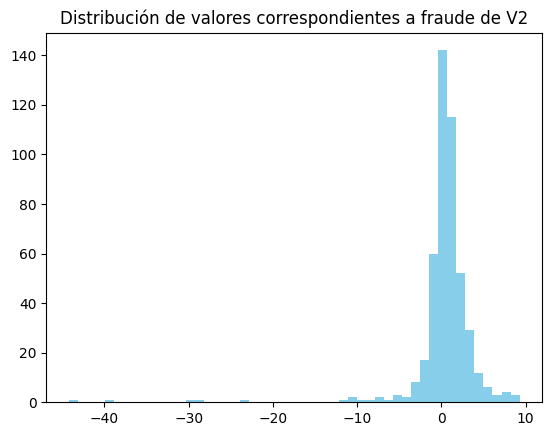

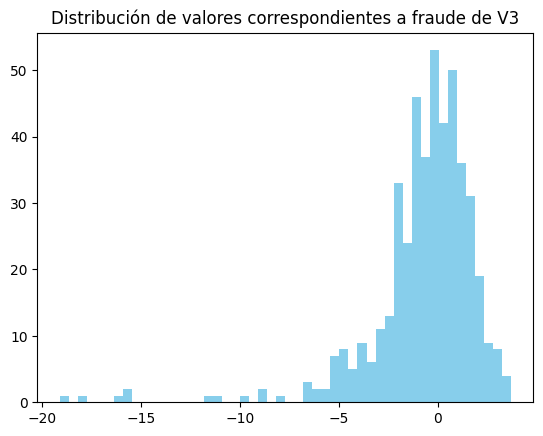

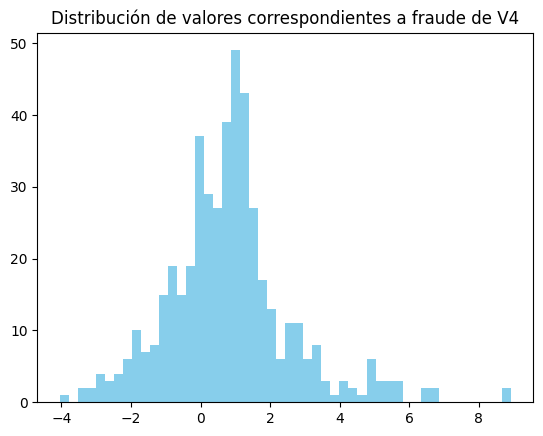

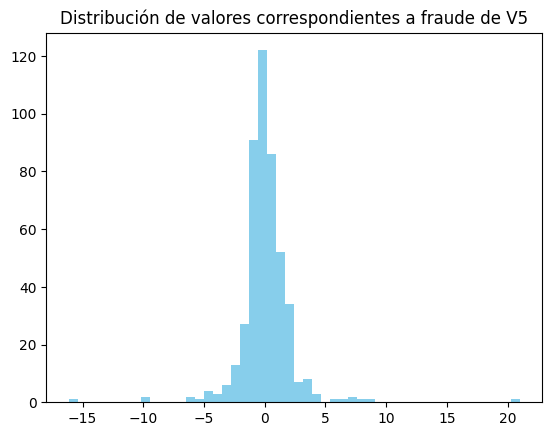

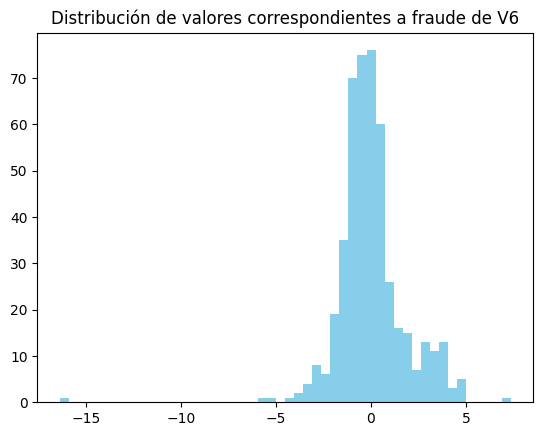

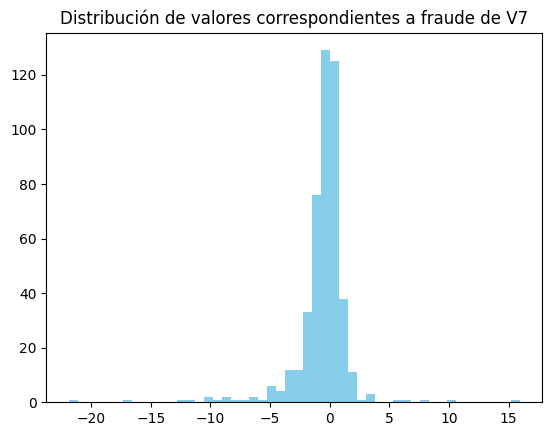

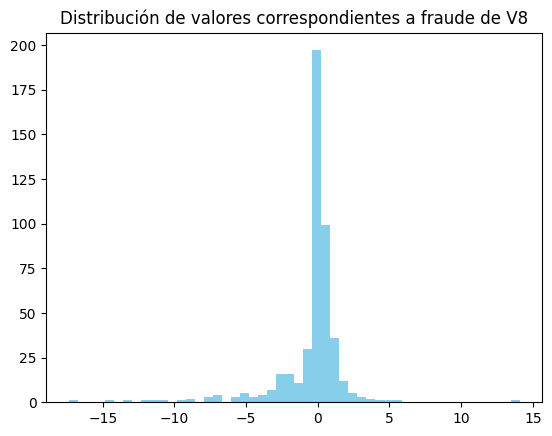

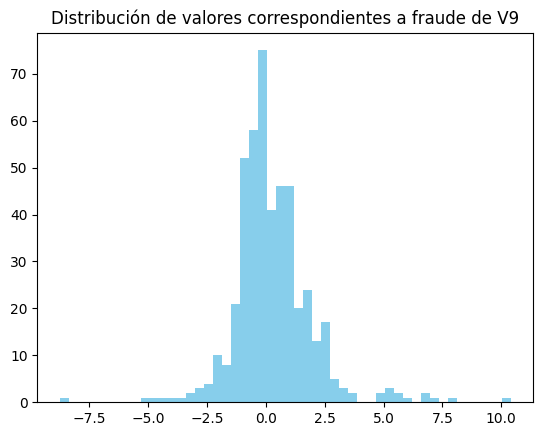

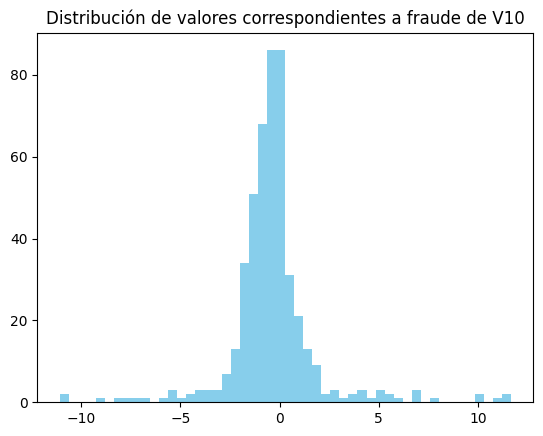

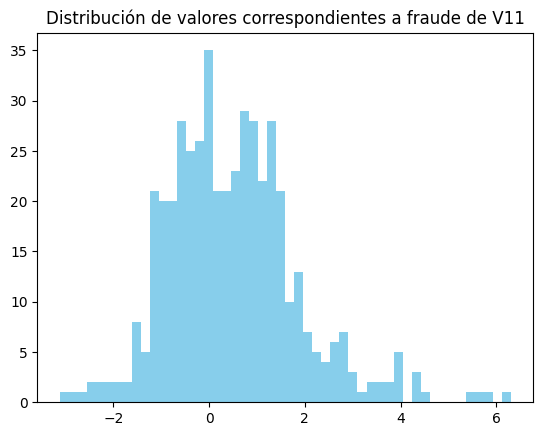

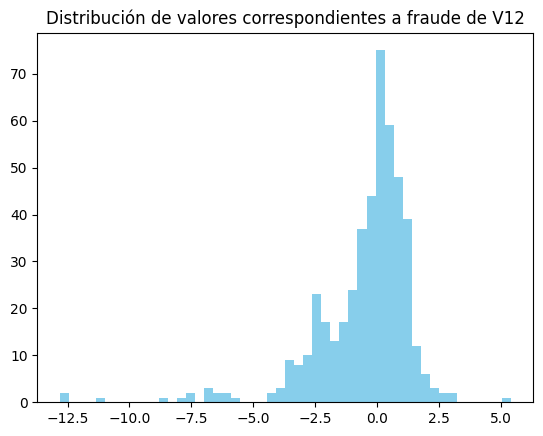

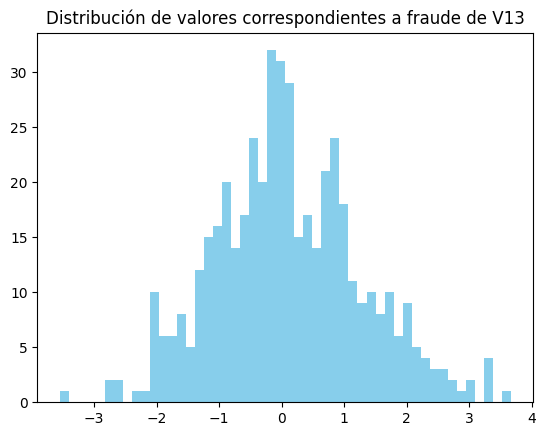

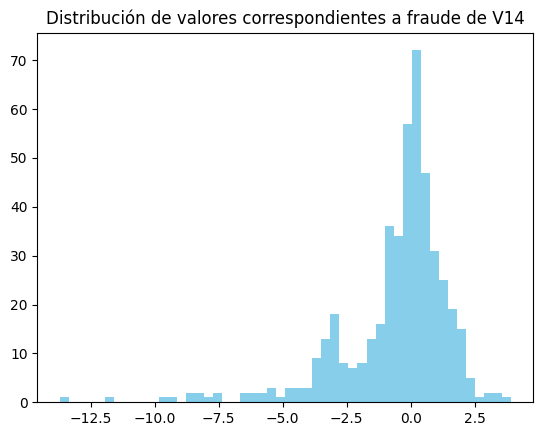

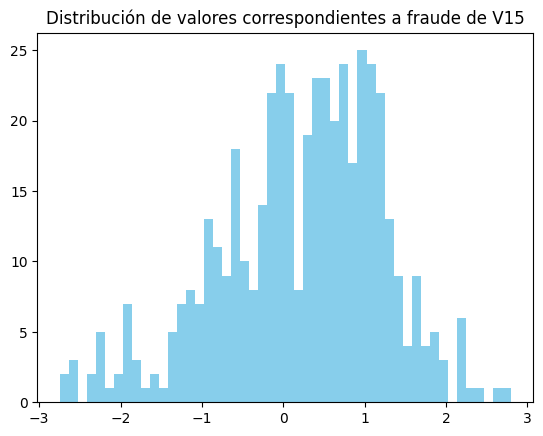

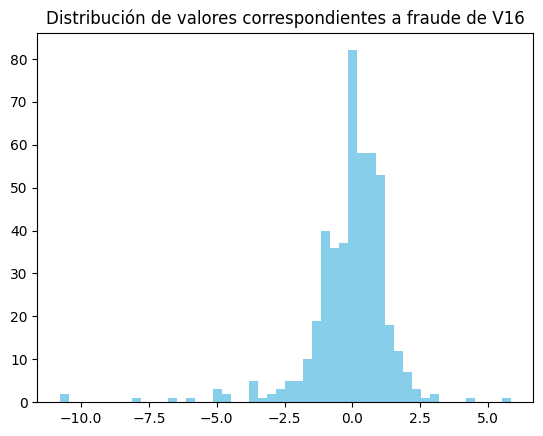

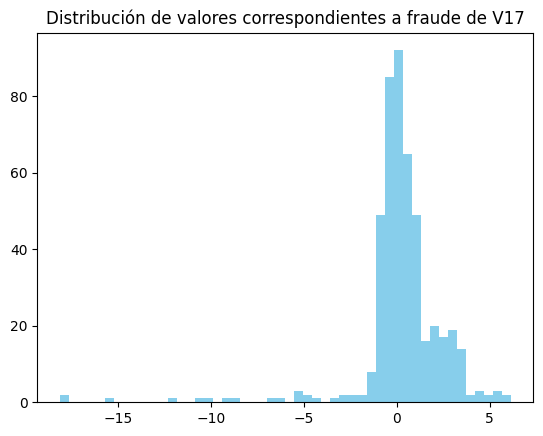

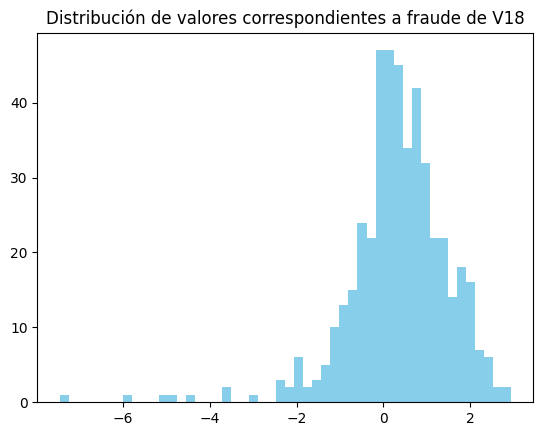

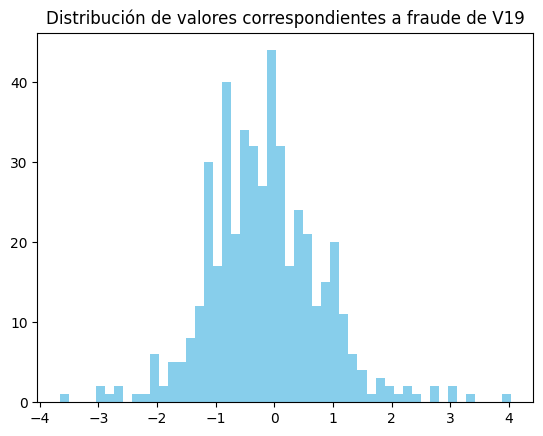

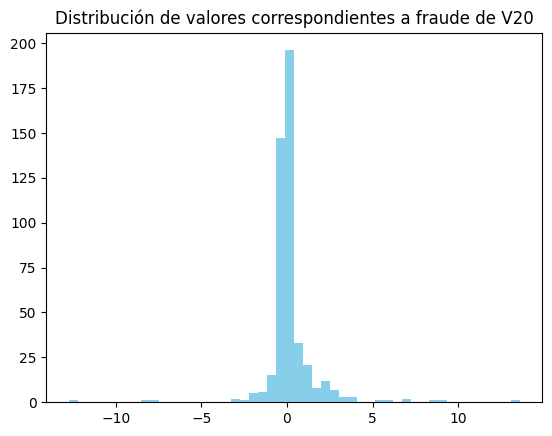

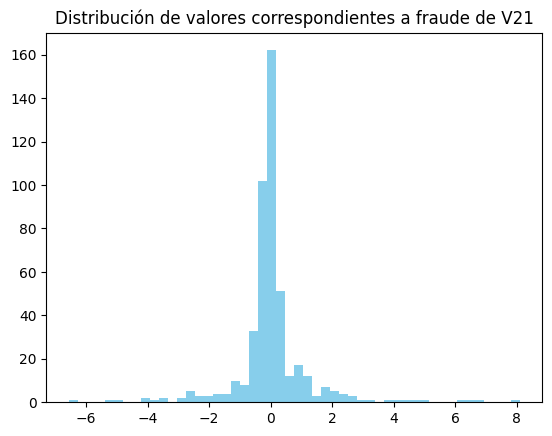

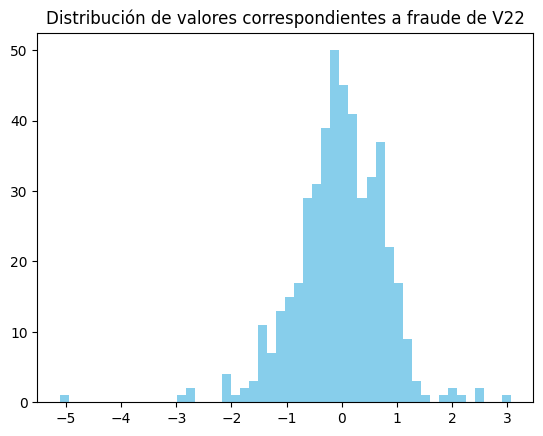

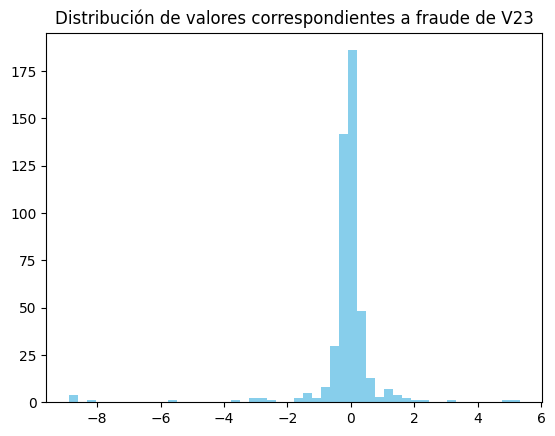

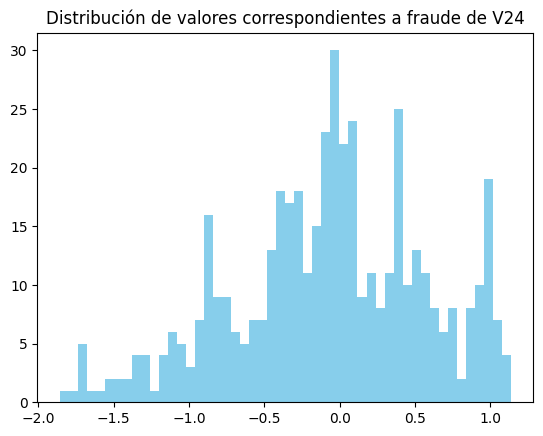

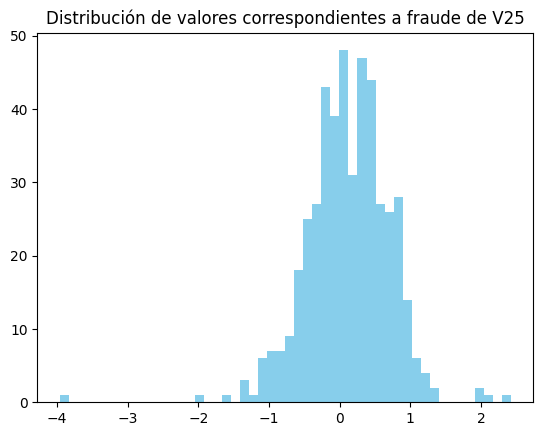

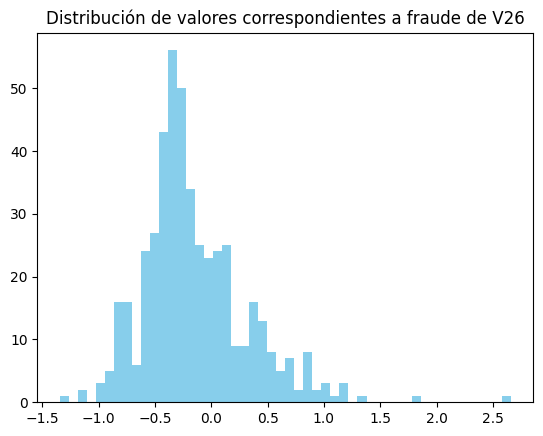

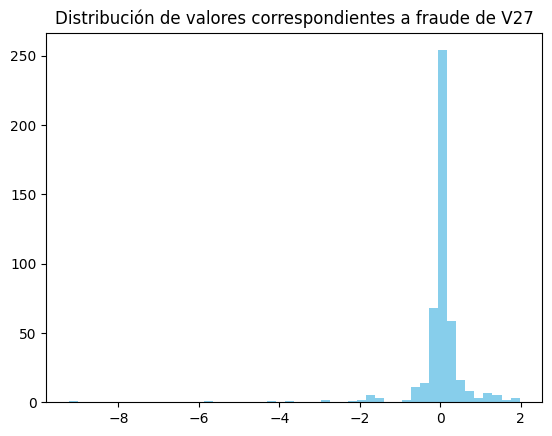

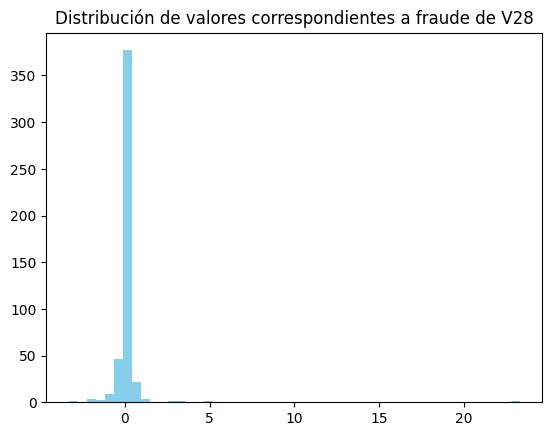

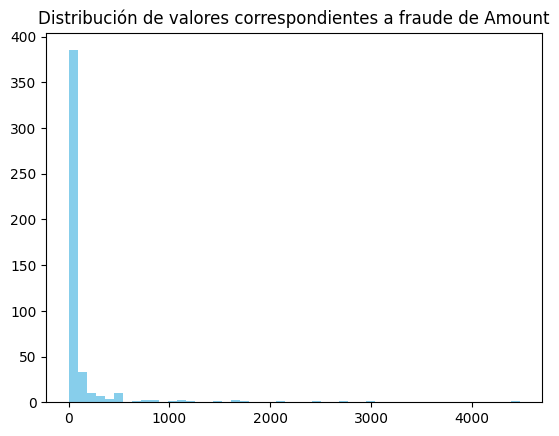

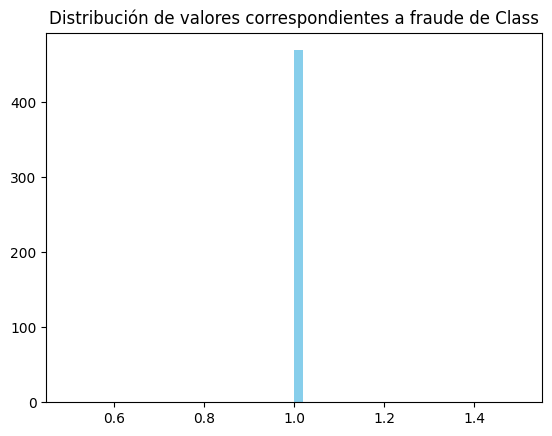

In [9]:
for col in df1.columns:
    #Filtrar las filas donde 'Class' es 1
    df_class_1 = df1[df1['Class'] == 1]
    
    plt.hist(df_class_1[col], bins=50, color='skyblue')
    plt.title(f'Distribución de valores correspondientes a fraude de {col}')
    plt.show()

Contamos con valores de fraudes de las variables con asimetría negativa, positiva y con distrbución normal. Por otro lado, hay algunos que no responden a ningun patrón detectable.

Como podemos ver a continuación, contamos con outliers. Procedemos a graficar las variables con boxplots para determinar que valores de las variables constituyen outliers

<Axes: >

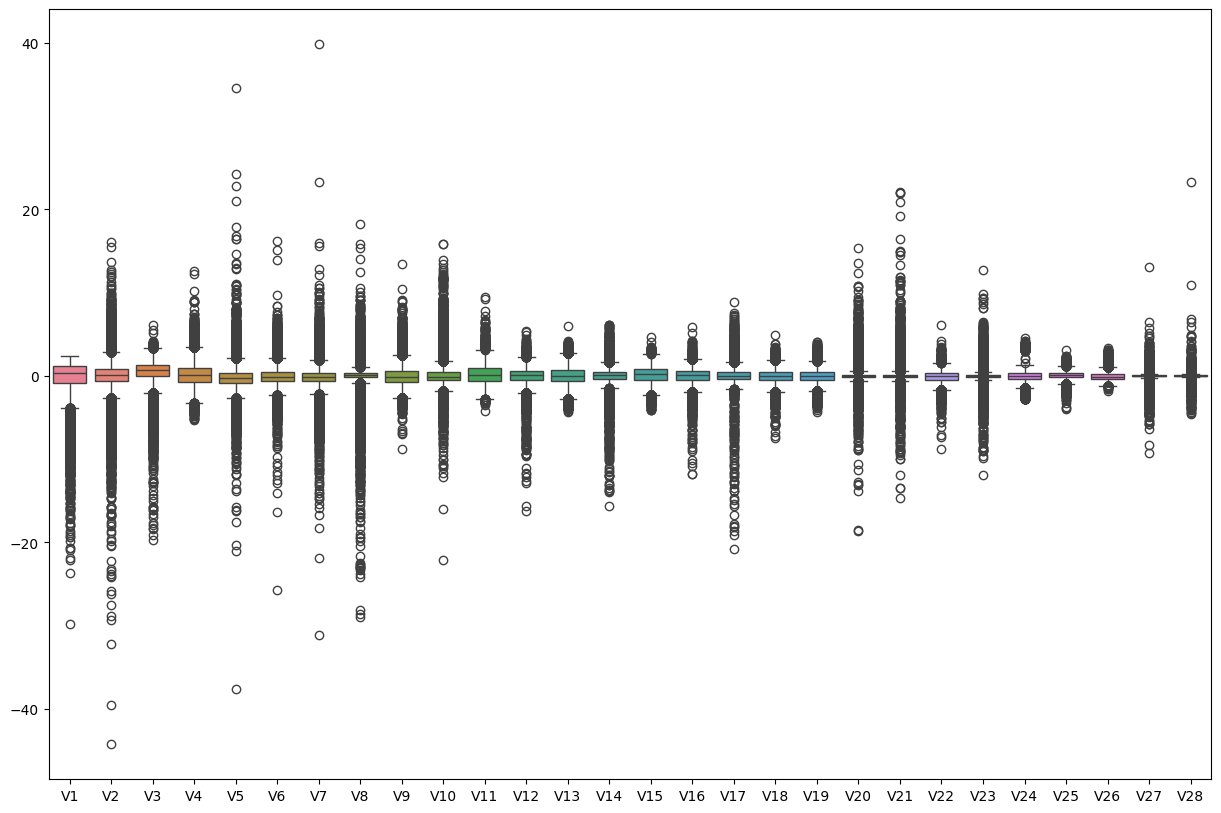

In [10]:
plt.figure(figsize = (15,10))
sns.boxplot(data=df1[[col for col in df1.columns if "V" in col]])

A pesar de detectar outliers de manera univariable, estos pueden estar aportando información útil al modelo, por lo que determinamos que no removerlos antes probar un primer modelo

# Entrenamiento de modelos de Machine Learning

Como tercer paso, procedemos al entrenamiento de tres modelos de machine learning, en este caso un clasificador, que pueda determinar, en base a los datos proporcionados como variables independientes (Time, Vi y amount), qué casos son fraude. El proceso de entrenamiento implica alimentar al modelo con un conjunto de datos de entrenamiento etiquetados, ajustar los parámetros del modelo a través de algoritmos de optimización, y evaluar su rendimiento mediante métricas específicas.

**Árbol de Decisión** 

**Random Forest**

**XGBoost Classifier**



### **Árbol de Decisión**

Se basa en la creación de una estructura de árbol donde cada nodo interno representa una característica del conjunto de datos y cada hoja representa una clasificación o un valor de regresión.

El proceso de construcción de un árbol de decisión implica la selección de la característica óptima en cada nodo interno, de modo que la división resultante maximice la homogeneidad de las muestras en las hojas. Esto se logra mediante el cálculo de medidas de impureza como la entropía o la ganancia de información.

El árbol se construye de manera recursiva, dividiendo el conjunto de datos en subconjuntos más pequeños en cada paso, hasta que se alcanza un criterio de detención predefinido, como una profundidad máxima del árbol o un número mínimo de muestras en las hojas.


**REDUCCIÓN DE DIMENSIONALIDAD** Habiendo terminado el análisis de las variables, procedemos a elegir un método de feature selection para reducir la dimensionalidad del dataset.

Considerando que tanto forward como backward y bi-directional feature selection pueden omitir variables importantes debido a la naturaleza de su algoritmo, se utilizarán los tres. 

En un caso ideal, los tres métodos determinarán que las variables a utilizar son las mismas. De no ser así, y considerando que no existe forma de evaluar los resultados en esta instancia, se procederán a crear tantos modelos de clasificación como grupos de variables se hayan obtenido con el método de reducción de dimensionalidad. Una vez obtenidos los modelos, se analizarán en búsqueda del mejor y, en base a esto, se establecerá el grupo de variables seleccionado.

In [11]:
sfs_r_f = SequentialFeatureSelector(RidgeClassifier(), direction='forward', cv=2)

In [12]:
sfs_r_b = SequentialFeatureSelector(RidgeClassifier(), direction='backward', cv=2)

In [13]:
df1_r_forward = sfs_r_f.fit_transform(df1.drop("Class", axis=1), df1["Class"])

In [14]:
df1_r_forward = pd.DataFrame(df1_r_forward, columns = sfs_r_f.get_feature_names_out())

In [15]:
df1_r_backward = sfs_r_b.fit_transform(df1.drop("Class", axis=1), df1["Class"])

In [16]:
df1_r_backward = pd.DataFrame(df1_r_backward, columns = sfs_r_b.get_feature_names_out())

In [17]:
# División del conjunto de datos en conjunto de entrenamiento y prueba
X_train, X_test = train_test_split(df1, test_size=0.2, random_state=42)

y_test = X_test['Class']

In [18]:
DTC_f = DecisionTreeClassifier()

DTC_f.fit(X_train[df1_r_forward.columns], X_train['Class'])

DecisionTreeClassifier()

In [19]:
DTC_b = DecisionTreeClassifier()

DTC_b.fit(X_train[df1_r_backward.columns], X_train['Class'])

DecisionTreeClassifier()

In [20]:
# Para X_test_f (excluyendo las variables V15 a V28, Amount y Class)
X_test_f = X_test[df1_r_forward.columns]

# Para X_test_b (excluyendo las variables Time, V1, V2, V6, V7, V8, V9, V13, V15, V18, V19, V21, V22, V24, V25 y Class)
X_test_b = X_test[df1_r_backward.columns]

In [21]:
# Realizar predicciones en el conjunto de prueba para ambos modelos
y_pred_f = DTC_f.predict(X_test_f)
y_pred_b = DTC_b.predict(X_test_b)

In [22]:
# Calcular métricas de evaluación para ambos modelos
accuracy_f = accuracy_score(y_test, y_pred_f)
precision_f = precision_score(y_test, y_pred_f)
recall_f = recall_score(y_test, y_pred_f)
f1_f = f1_score(y_test, y_pred_f)
roc_auc_f = roc_auc_score(y_test, y_pred_f)

accuracy_b = accuracy_score(y_test, y_pred_b)
precision_b = precision_score(y_test, y_pred_b)
recall_b = recall_score(y_test, y_pred_b)
f1_b = f1_score(y_test, y_pred_b)
roc_auc_b = roc_auc_score(y_test, y_pred_b)

# Imprimir las métricas de evaluación para ambos modelos
print("Decision Tree Classifier Forward:")
print("Accuracy:", accuracy_f)
print("Precision:", precision_f)
print("Recall:", recall_f)
print("F1-score:", f1_f)
print("ROC AUC:", roc_auc_f)
print()

print("Decision Tree Classifier Backward:")
print("Accuracy:", accuracy_b)
print("Precision:", precision_b)
print("Recall:", recall_b)
print("F1-score:", f1_b)
print("ROC AUC:", roc_auc_b)
print()

# Comparar las métricas y determinar cuál modelo es mejor
mejor_modelo = 'Forward' if accuracy_f > accuracy_b else 'Backward'
print("El mejor modelo es:", mejor_modelo)

Decision Tree Classifier Forward:
Accuracy: 0.9950486012869073
Precision: 0.025210084033613446
Recall: 0.028846153846153848
F1-score: 0.026905829596412554
ROC AUC: 0.5130965136368595

Decision Tree Classifier Backward:
Accuracy: 0.9952083238260393
Precision: 0.01818181818181818
Recall: 0.019230769230769232
F1-score: 0.018691588785046728
ROC AUC: 0.5083803084523546

El mejor modelo es: Backward


Considerando que nuestros árboles de decisión dieron un ROC de 0.5, significa que los modelos están clasificando las clases de manera aleatoria. Esto puede ser indicativo de que los modelos son demasiado simples o tienen un porblema de ajuste de los datos.

El Random Forest puede ser una buena opción cuando un solo árbol de decisión no logra producir resultados satisfactorios, ya que tiene la capacidad de capturar mejor la complejidad de los datos y reducir el sobreajuste.


El Random forest se basa en la combinación de múltiples árboles de decisión para mejorar la precisión y la generalización del modelo. Funciona construyendo una colección (o "bosque") de árboles de decisión individuales, donde cada árbol se entrena con una muestra aleatoria del conjunto de datos original y utilizando un subconjunto aleatorio de características en cada división.

In [23]:
RFC_f = RandomForestClassifier(max_depth = 7)

RFC_f.fit(X_train[df1_r_forward.columns], X_train['Class'])

RandomForestClassifier(max_depth=7)

In [24]:
RFC_b = RandomForestClassifier(n_estimators = 1000, max_depth = 7)

RFC_b.fit(X_train[df1_r_backward.columns], X_train['Class'])

RandomForestClassifier(max_depth=7, n_estimators=1000)

In [25]:
roc_auc_score(X_train['Class'], RFC_b.predict(X_train[df1_r_backward.columns]))

0.5273972602739726

In [26]:
y_pred_f = RFC_f.predict(X_test_f)
y_pred_b = RFC_b.predict(X_test_b)

In [27]:
# Calcular métricas de evaluación para ambos modelos
accuracy_f = accuracy_score(y_test, y_pred_f)
precision_f = precision_score(y_test, y_pred_f)
recall_f = recall_score(y_test, y_pred_f)
f1_f = f1_score(y_test, y_pred_f)
roc_auc_f = roc_auc_score(y_test, y_pred_f)

accuracy_b = accuracy_score(y_test, y_pred_b)
precision_b = precision_score(y_test, y_pred_b)
recall_b = recall_score(y_test, y_pred_b)
f1_b = f1_score(y_test, y_pred_b)
roc_auc_b = roc_auc_score(y_test, y_pred_b)

# Imprimir las métricas de evaluación para ambos modelos
print("Random Forest Classifier Forward:")
print("Accuracy:", accuracy_f)
print("Precision:", precision_f)
print("Recall:", recall_f)
print("F1-score:", f1_f)
print("ROC AUC:", roc_auc_f)
print()

print("Random Forest Classifier Backward:")
print("Accuracy:", accuracy_b)
print("Precision:", precision_b)
print("Recall:", recall_b)
print("F1-score:", f1_b)
print("ROC AUC:", roc_auc_b)
print()

# Comparar las métricas y determinar cuál modelo es mejor
mejor_modelo = 'Forward' if accuracy_f > accuracy_b else 'Backward'
print("El mejor modelo es:", mejor_modelo)

Random Forest Classifier Forward:
Accuracy: 0.9976041619130197
Precision: 0.0
Recall: 0.0
F1-score: 0.0
ROC AUC: 0.4999885641096016

Random Forest Classifier Backward:
Accuracy: 0.99762697941861
Precision: 0.0
Recall: 0.0
F1-score: 0.0
ROC AUC: 0.5

El mejor modelo es: Backward


C:\Users\bl28998\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dado que el modelo de Random Forest también está dando un roc de 0.5, intentamos nuevamente con un modelo nuevo (XGBClassifier), esta vez evaluaremos los distintos datasets (obtenidos del Sequential feature selector) y el dataset completo para descartar la posibilidad de que el modelo necesite una combinación de variables distinta a la establecida por el feature selector. Procederemos a evaluarlo primero con el subconjunto train y, luego, con el subconjunto test

## **XGB Classifier**

Consideramos que este modelo trabajará mejor que los dos previos debido a las siguientes característitcas

**Boosting**: utiliza un enfoque de aprendizaje secuencial en el que se construyen múltiples modelos débiles (por lo general, árboles de decisión poco profundos) de manera iterativa. Cada modelo se ajusta a los errores del modelo anterior, lo que permite mejorar gradualmente la precisión del clasificador.

**Regularización**: incluye opciones para aplicar regularización L1 y L2, lo que ayuda a prevenir el sobreajuste del modelo al penalizar coeficientes grandes.

**Manejo eficiente de datos**: está diseñado para manejar conjuntos de datos grandes y complejos de manera eficiente, utilizando una estructura de datos especializada conocida como árbol de gradiente optimizado (optimal gradient boosting tree) que minimiza la sobrecarga de memoria y computación. Nuestro data set cuenta con mas de 284.000 filas y 30 columnas.

**Flexibilidad en la configuración**: ofrece una amplia gama de parámetros que pueden ser ajustados para adaptarse a diferentes tipos de datos y problemas. Esto incluye parámetros para controlar la profundidad máxima de los árboles, la tasa de aprendizaje, la cantidad de árboles en el ensamble, entre otros.

Utilizaremos **Stratified K-Fold Cross-Validation** para asegura que cada pliegue tenga una proporción aproximadamente igual de muestras de cada clase, lo cual es fundamental en nuestro dataset considerando el desbalance, asegurando una mayor robustez, reduciendo el sesgo y mejorando el rendimiento del modelo. Preservar esta proporción en cada pliegue ayuda a garantizar que el modelo sea evaluado de manera imparcial en todos los pliegues. Dividiremos el conjunto de datos en 5 pliegues estratificados.

In [28]:
X = df1.drop('Class', axis=1)
y = df1['Class']

In [29]:
xgb_params = {'n_estimators'     : 2000,
              'min_child_weight' : 96,
              'max_depth'        : 7,
              'learning_rate'    : 0.18,
              'subsample'        : 0.95,
              'colsample_bytree' : 0.95,
              'reg_lambda'       : 1.50,
              'reg_alpha'        : 1.50,
              'gamma'            : 1.50,
              'max_bin'          : 512,
              'random_state'     : 42,
              'objective'        : 'binary:logistic',
              'tree_method'      : 'hist',
              'eval_metric'      : 'auc'
             }

xgb_scores = []
feature_importance_list = []

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for fold, (train_idx, valid_idx) in enumerate(kf.split(X, y)):
    X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
    y_train , y_valid = y.iloc[train_idx] , y.iloc[valid_idx]
    
    xgb_model = XGBClassifier(**xgb_params)
    xgb_model.fit(X_train, y_train,verbose=0)
    
    y_pred = xgb_model.predict_proba(X_valid)[:, 1]
    auc = roc_auc_score(y_valid,  y_pred)
    xgb_scores.append(auc)
    print(115*'-')
    print(f"\nFold: {fold+1}, AUC score: {auc:.2f}\n")
    print(115*'-')

    
    # Guardar la importancia de las características para este fold
    feature_importance_list.append(xgb_model.feature_importances_)
    
print("Mean AUC :", np.mean(xgb_scores))

-------------------------------------------------------------------------------------------------------------------

Fold: 1, AUC score: 0.81

-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------

Fold: 2, AUC score: 0.84

-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------

Fold: 3, AUC score: 0.80

-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------

Fold: 4, AUC score: 0.79

--------------------------------------------------------------------------------

In [30]:
# Calcular la importancia media de las características
mean_feature_importance = np.mean(feature_importance_list, axis=0)

# Obtener nombres de características
feature_names = X.columns

# Crear un DataFrame para mostrar las importancias de las características
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': mean_feature_importance})
# Ordenar por importancia de las características
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

   Feature  Importance
3       V3    0.108397
2       V2    0.087246
14     V14    0.074626
10     V10    0.073626
8       V8    0.048398
18     V18    0.048351
4       V4    0.046175
1       V1    0.041964
29  Amount    0.037321
7       V7    0.032251
9       V9    0.030338
26     V26    0.030307
12     V12    0.027343
19     V19    0.025123
21     V21    0.024283
17     V17    0.022651
24     V24    0.020751
11     V11    0.019180
28     V28    0.019057
16     V16    0.018791
27     V27    0.017786
6       V6    0.017644
5       V5    0.017261
13     V13    0.017182
15     V15    0.017087
0     Time    0.016475
22     V22    0.015847
23     V23    0.015609
25     V25    0.014831
20     V20    0.014098


Procedemos a graficar las variables de acuerdo a su importancia, en orden de mayor a menor.

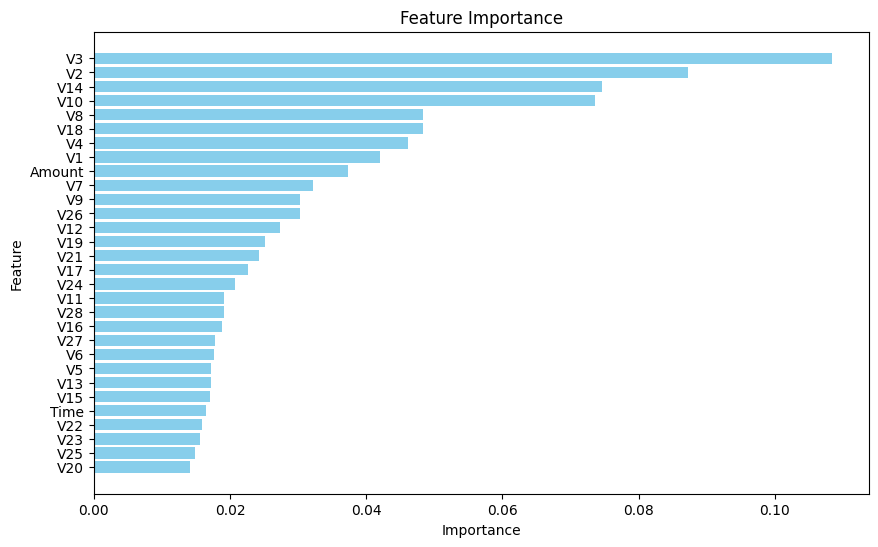

In [31]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar la característica más importante en la parte superior
plt.show()

### Evaluación

Considerando que el modelo anterior fue evaluado con la totalidad de las variables, correremos ahora 5 modelos que utilizen menos variables que el anteiror para determinar, en base a los resultados de sus curvas ROC, cuál es el mejor y, en consecuencia, si hay variables que es preferible no incluir para evitar que sumen ruido.

Considerando que estamos utilizando un XGBClassifier, y que como fue mencionado previamente trabaja de manera secuencial y aprende de los errores de los modelos previos, es muy probable que el mejor modelo sea el que incluye todas las variables. De esta forma, si en el futuro aparece algún valor que discrepe con los actuales, lejos de sumarle ruido al modelo, le permitirá aprender y re-priorizar las variables.

-------------------------------------------------------------------------------------------------------------------

Fold: 1, AUC score: 0.79

-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------

Fold: 2, AUC score: 0.79

-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------

Fold: 3, AUC score: 0.79

-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------

Fold: 4, AUC score: 0.79

--------------------------------------------------------------------------------

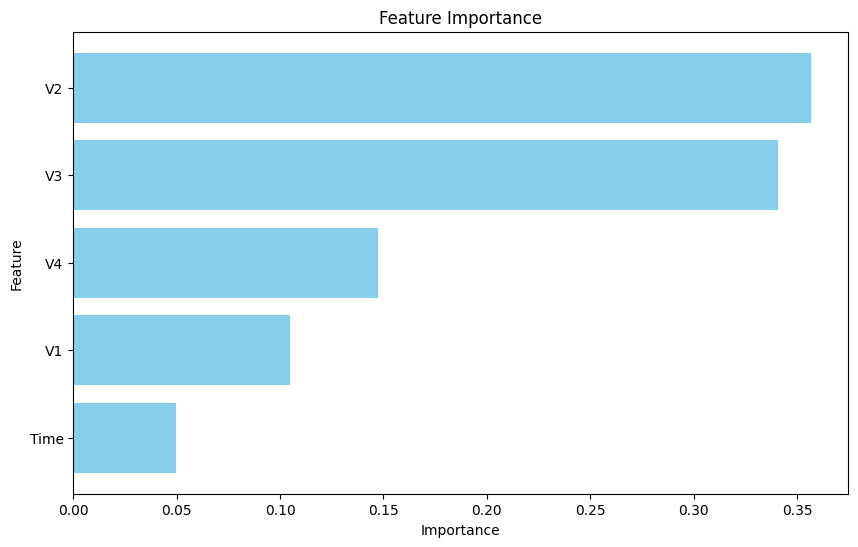

In [32]:
xgb_params1 = {'n_estimators'     : 2000,
              'min_child_weight' : 96,
              'max_depth'        : 7,
              'learning_rate'    : 0.18,
              'subsample'        : 0.95,
              'colsample_bytree' : 0.95,
              'reg_lambda'       : 1.50,
              'reg_alpha'        : 1.50,
              'gamma'            : 1.50,
              'max_bin'          : 512,
              'random_state'     : 42,
              'objective'        : 'binary:logistic',
              'tree_method'      : 'hist',
              'eval_metric'      : 'auc'
             }

xgb_scores1 = []
feature_importance_list1 = []

kf1 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for fold, (train_idx, valid_idx) in enumerate(kf.split(X.iloc[:, :5], y)):
    X_train1, X_valid1 = X.iloc[train_idx, :5], X.iloc[valid_idx, :5]
    y_train1, y_valid1 = y.iloc[train_idx] , y.iloc[valid_idx]
    
    xgb_model1 = XGBClassifier(**xgb_params1)
    xgb_model1.fit(X_train1, y_train1, verbose=0)
    
    y_pred1 = xgb_model1.predict_proba(X_valid1)[:, 1]
    auc1 = roc_auc_score(y_valid1,  y_pred1)
    xgb_scores1.append(auc)
    print(115*'-')
    print(f"\nFold: {fold+1}, AUC score: {auc:.2f}\n")
    print(115*'-')
    
    # Guardar la importancia de las características para este fold
    feature_importance_list1.append(xgb_model1.feature_importances_)
    
print("Mean AUC 1:", np.mean(xgb_scores1))

# Calcular la importancia promedio de las características sobre todos los folds
mean_importance1 = np.mean(feature_importance_list1, axis=0)

# Crear un DataFrame para almacenar la importancia promedio de las características
feature_importance_df1 = pd.DataFrame({'Feature': X.columns[:5], 'Importance': mean_importance1})

# Ordenar el DataFrame por importancia de las características
feature_importance_df1 = feature_importance_df1.sort_values(by='Importance', ascending=False)

print(feature_importance_df1)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df1['Feature'], feature_importance_df1['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar la característica más importante en la parte superior
plt.show()

-------------------------------------------------------------------------------------------------------------------

Fold: 1, AUC score: 0.79

-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------

Fold: 2, AUC score: 0.79

-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------

Fold: 3, AUC score: 0.79

-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------

Fold: 4, AUC score: 0.79

--------------------------------------------------------------------------------

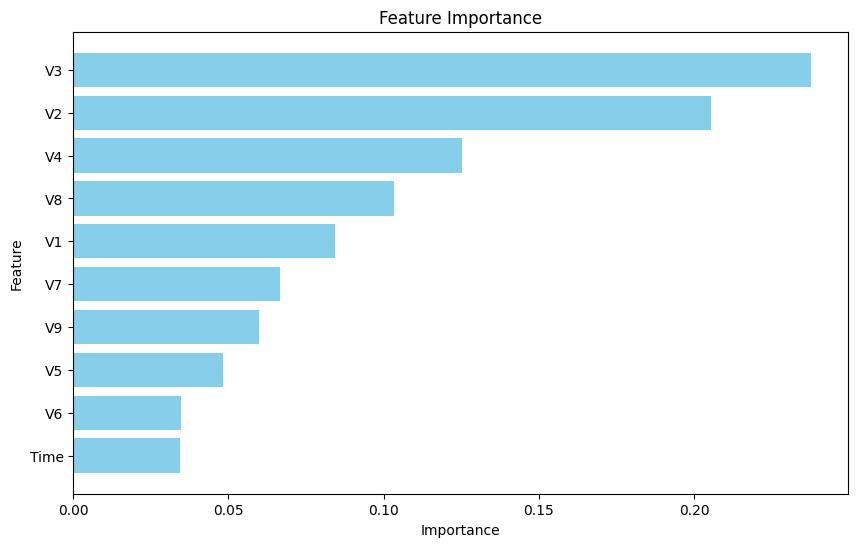

In [33]:
xgb_params2 = {'n_estimators'     : 2000,
              'min_child_weight' : 96,
              'max_depth'        : 7,
              'learning_rate'    : 0.18,
              'subsample'        : 0.95,
              'colsample_bytree' : 0.95,
              'reg_lambda'       : 1.50,
              'reg_alpha'        : 1.50,
              'gamma'            : 1.50,
              'max_bin'          : 512,
              'random_state'     : 42,
              'objective'        : 'binary:logistic',
              'tree_method'      : 'hist',
              'eval_metric'      : 'auc'
             }

xgb_scores2 = []
feature_importance_list2 = []

kf2 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for fold, (train_idx, valid_idx) in enumerate(kf.split(X.iloc[:, :10], y)):
    X_train2, X_valid2 = X.iloc[train_idx, :10], X.iloc[valid_idx, :10]
    y_train2, y_valid2 = y.iloc[train_idx] , y.iloc[valid_idx]
    
    xgb_model2 = XGBClassifier(**xgb_params2)
    xgb_model2.fit(X_train2, y_train2, verbose=0)
    
    y_pred2 = xgb_model2.predict_proba(X_valid2)[:, 1]
    auc2 = roc_auc_score(y_valid2,  y_pred2)
    xgb_scores2.append(auc)
    print(115*'-')
    print(f"\nFold: {fold+1}, AUC score: {auc:.2f}\n")
    print(115*'-')
    
    # Guardar la importancia de las características para este fold
    feature_importance_list2.append(xgb_model2.feature_importances_)
    
print("Mean AUC 2:", np.mean(xgb_scores2))

# Calcular la importancia promedio de las características sobre todos los folds
mean_importance2 = np.mean(feature_importance_list2, axis=0)

# Crear un DataFrame para almacenar la importancia promedio de las características
feature_importance_df2 = pd.DataFrame({'Feature': X.columns[:10], 'Importance': mean_importance2})

# Ordenar el DataFrame por importancia de las características
feature_importance_df2 = feature_importance_df2.sort_values(by='Importance', ascending=False)

print(feature_importance_df2)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df2['Feature'], feature_importance_df2['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar la característica más importante en la parte superior
plt.show()

-------------------------------------------------------------------------------------------------------------------

Fold: 1, AUC score: 0.79

-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------

Fold: 2, AUC score: 0.79

-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------

Fold: 3, AUC score: 0.79

-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------

Fold: 4, AUC score: 0.79

--------------------------------------------------------------------------------

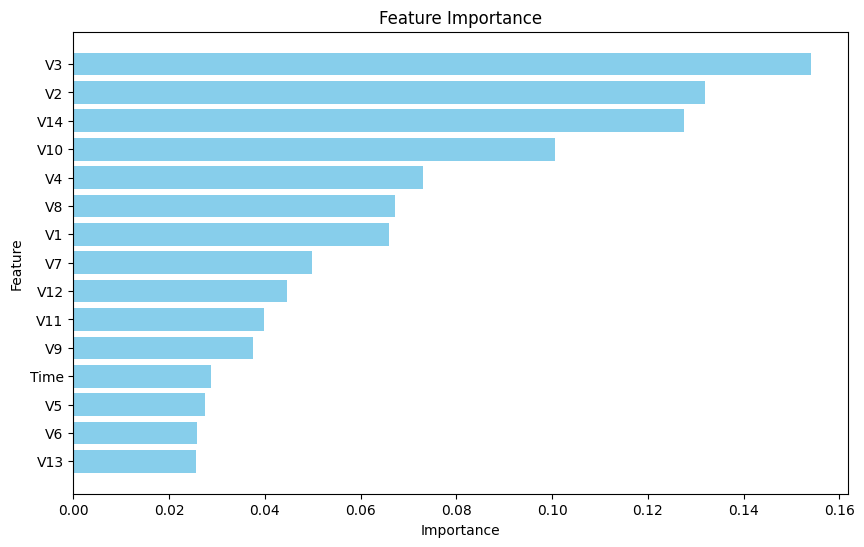

In [34]:
xgb_params3 = {'n_estimators'     : 2000,
              'min_child_weight' : 96,
              'max_depth'        : 7,
              'learning_rate'    : 0.18,
              'subsample'        : 0.95,
              'colsample_bytree' : 0.95,
              'reg_lambda'       : 1.50,
              'reg_alpha'        : 1.50,
              'gamma'            : 1.50,
              'max_bin'          : 512,
              'random_state'     : 42,
              'objective'        : 'binary:logistic',
              'tree_method'      : 'hist',
              'eval_metric'      : 'auc'
             }

xgb_scores3 = []
feature_importance_list3 = []

kf3 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for fold, (train_idx, valid_idx) in enumerate(kf.split(X.iloc[:, :15], y)):
    X_train3, X_valid3 = X.iloc[train_idx, :15], X.iloc[valid_idx, :15]
    y_train3, y_valid3 = y.iloc[train_idx] , y.iloc[valid_idx]
    
    xgb_model3 = XGBClassifier(**xgb_params3)
    xgb_model3.fit(X_train3, y_train3, verbose=0)
    
    y_pred3 = xgb_model3.predict_proba(X_valid3)[:, 1]
    auc3 = roc_auc_score(y_valid3,  y_pred3)
    xgb_scores3.append(auc)
    print(115*'-')
    print(f"\nFold: {fold+1}, AUC score: {auc:.2f}\n")
    print(115*'-')
    
    # Guardar la importancia de las características para este fold
    feature_importance_list3.append(xgb_model3.feature_importances_)
    
print("Mean AUC 3:", np.mean(xgb_scores3))

# Calcular la importancia promedio de las características sobre todos los folds
mean_importance3 = np.mean(feature_importance_list3, axis=0)

# Crear un DataFrame para almacenar la importancia promedio de las características
feature_importance_df3 = pd.DataFrame({'Feature': X.columns[:15], 'Importance': mean_importance3})

# Ordenar el DataFrame por importancia de las características
feature_importance_df3 = feature_importance_df3.sort_values(by='Importance', ascending=False)

print(feature_importance_df3)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df3['Feature'], feature_importance_df3['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar la característica más importante en la parte superior
plt.show()

-------------------------------------------------------------------------------------------------------------------

Fold: 1, AUC score: 0.79

-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------

Fold: 2, AUC score: 0.79

-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------

Fold: 3, AUC score: 0.79

-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------

Fold: 4, AUC score: 0.79

--------------------------------------------------------------------------------

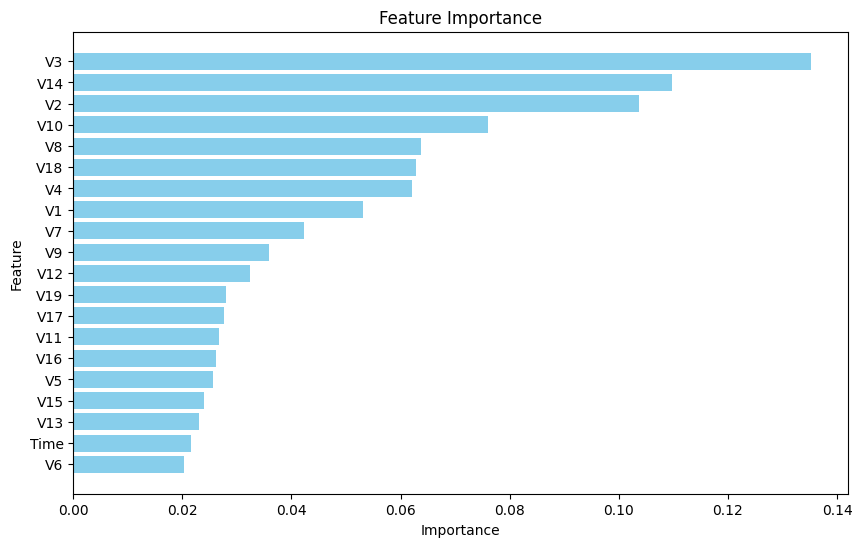

In [35]:
xgb_params4 = {'n_estimators'     : 2000,
              'min_child_weight' : 96,
              'max_depth'        : 7,
              'learning_rate'    : 0.18,
              'subsample'        : 0.95,
              'colsample_bytree' : 0.95,
              'reg_lambda'       : 1.50,
              'reg_alpha'        : 1.50,
              'gamma'            : 1.50,
              'max_bin'          : 512,
              'random_state'     : 42,
              'objective'        : 'binary:logistic',
              'tree_method'      : 'hist',
              'eval_metric'      : 'auc'
             }

xgb_scores4 = []
feature_importance_list4 = []

kf4 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for fold, (train_idx, valid_idx) in enumerate(kf.split(X.iloc[:, :20], y)):
    X_train4, X_valid4 = X.iloc[train_idx, :20], X.iloc[valid_idx, :20]
    y_train4, y_valid4 = y.iloc[train_idx] , y.iloc[valid_idx]
    
    xgb_model4 = XGBClassifier(**xgb_params4)
    xgb_model4.fit(X_train4, y_train4, verbose=0)
    
    y_pred4 = xgb_model4.predict_proba(X_valid4)[:, 1]
    auc4 = roc_auc_score(y_valid4,  y_pred4)
    xgb_scores4.append(auc)
    print(115*'-')
    print(f"\nFold: {fold+1}, AUC score: {auc:.2f}\n")
    print(115*'-')
    
    # Guardar la importancia de las características para este fold
    feature_importance_list4.append(xgb_model4.feature_importances_)
    
print("Mean AUC 4:", np.mean(xgb_scores4))

# Calcular la importancia promedio de las características sobre todos los folds
mean_importance4 = np.mean(feature_importance_list4, axis=0)

# Crear un DataFrame para almacenar la importancia promedio de las características
feature_importance_df4 = pd.DataFrame({'Feature': X.columns[:20], 'Importance': mean_importance4})

# Ordenar el DataFrame por importancia de las características
feature_importance_df4 = feature_importance_df4.sort_values(by='Importance', ascending=False)

print(feature_importance_df4)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df4['Feature'], feature_importance_df4['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar la característica más importante en la parte superior
plt.show()

-------------------------------------------------------------------------------------------------------------------

Fold: 1, AUC score: 0.79

-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------

Fold: 2, AUC score: 0.79

-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------

Fold: 3, AUC score: 0.79

-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------

Fold: 4, AUC score: 0.79

--------------------------------------------------------------------------------

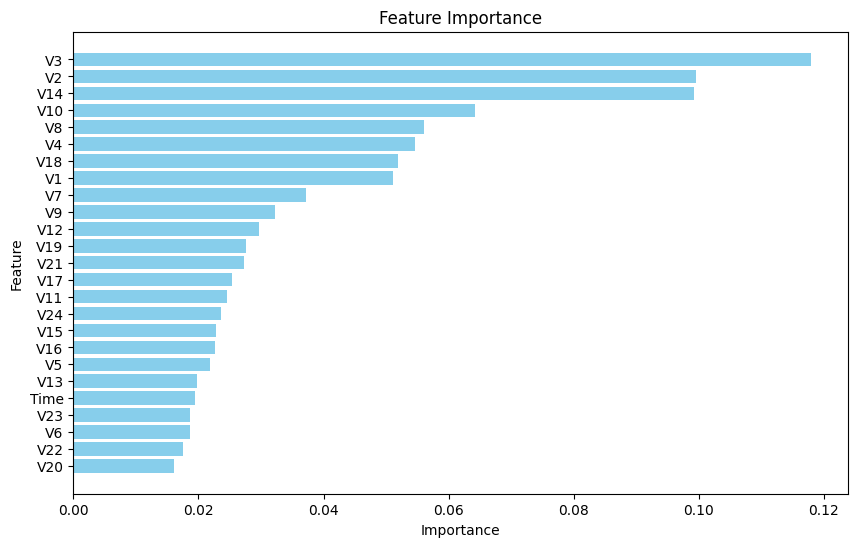

In [36]:
xgb_params5 = {'n_estimators'     : 2000,
              'min_child_weight' : 96,
              'max_depth'        : 7,
              'learning_rate'    : 0.18,
              'subsample'        : 0.95,
              'colsample_bytree' : 0.95,
              'reg_lambda'       : 1.50,
              'reg_alpha'        : 1.50,
              'gamma'            : 1.50,
              'max_bin'          : 512,
              'random_state'     : 42,
              'objective'        : 'binary:logistic',
              'tree_method'      : 'hist',
              'eval_metric'      : 'auc'
             }

xgb_scores5 = []
feature_importance_list5 = []

kf5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for fold, (train_idx, valid_idx) in enumerate(kf.split(X.iloc[:, :25], y)):
    X_train5, X_valid5 = X.iloc[train_idx, :25], X.iloc[valid_idx, :25]
    y_train5, y_valid5 = y.iloc[train_idx] , y.iloc[valid_idx]
    
    xgb_model5 = XGBClassifier(**xgb_params5)
    xgb_model5.fit(X_train5, y_train5, verbose=0)
    
    y_pred5 = xgb_model5.predict_proba(X_valid5)[:, 1]
    auc5 = roc_auc_score(y_valid5,  y_pred5)
    xgb_scores5.append(auc)
    print(115*'-')
    print(f"\nFold: {fold+1}, AUC score: {auc:.2f}\n")
    print(115*'-')
    
    # Guardar la importancia de las características para este fold
    feature_importance_list5.append(xgb_model5.feature_importances_)
    
print("Mean AUC 5:", np.mean(xgb_scores5))

# Calcular la importancia promedio de las características sobre todos los folds
mean_importance5 = np.mean(feature_importance_list5, axis=0)

# Crear un DataFrame para almacenar la importancia promedio de las características
feature_importance_df5 = pd.DataFrame({'Feature': X.columns[:25], 'Importance': mean_importance5})

# Ordenar el DataFrame por importancia de las características
feature_importance_df5 = feature_importance_df5.sort_values(by='Importance', ascending=False)

print(feature_importance_df5)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df5['Feature'], feature_importance_df5['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar la característica más importante en la parte superior
plt.show()

### Selección de Variables

De acuerdo con la hipótesis planteada originalmente en base a la lógica detras del XGBClassifier, si bien las últimas variables aportan poca información (alrededor del 1% cada una), estas también resultan relevantes para el modelo. Esto se evidencia el el mean AUC score que sigue siendo superior para el modelo que contiene todas las variables en comparación a los otros modelos 

In [40]:
X_test.drop('Class', axis = 1, inplace = True)

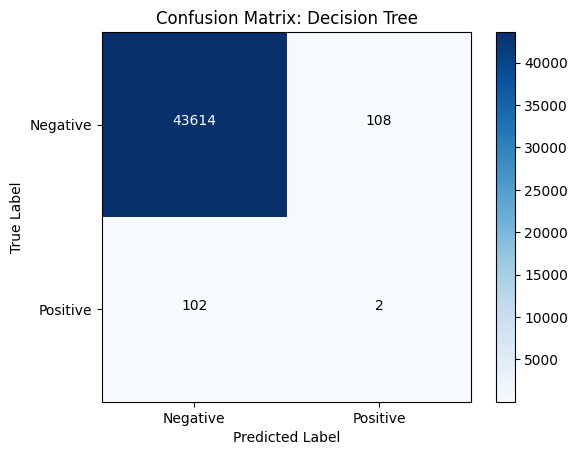

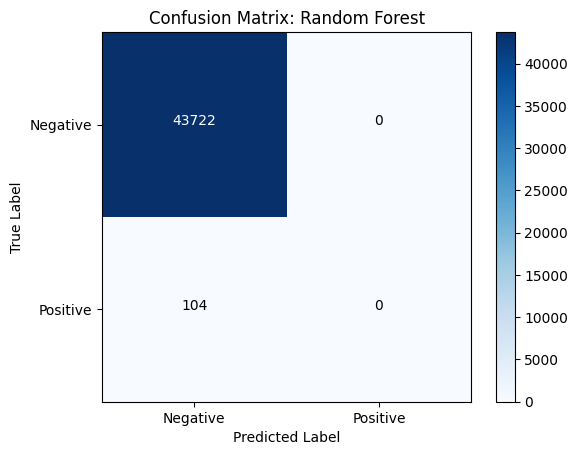

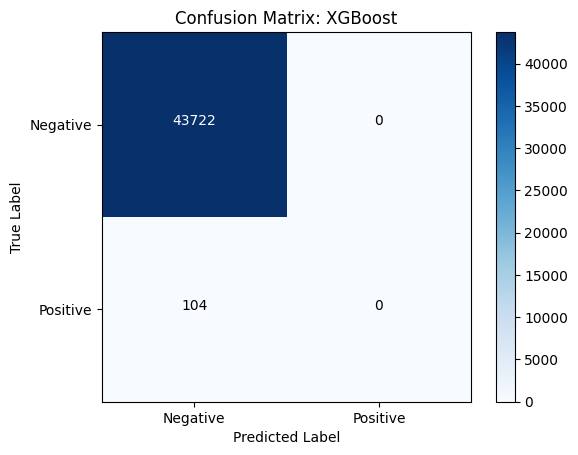

In [41]:
# Función matriz de confusión
def plot_confusion_matrix(model, X_test, y_test, label, y_pred = []):
    if len(y_pred)==0 : 
        y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix: ' + label)
    plt.colorbar()
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    tick_marks = np.arange(len(np.unique(y)))
    class_labels = ['Negative', 'Positive']
    plt.xticks(tick_marks, class_labels)
    plt.yticks(tick_marks, class_labels)
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")


# Graficar la matriz de confusión para cada modelo

plot_confusion_matrix(DTC_b, X_test_b, y_test, 'Decision Tree')
plt.show()

plot_confusion_matrix(RFC_b, X_test_b, y_test, 'Random Forest')
plt.show()

plot_confusion_matrix(xgb_model, X_test, y_test, 'XGBoost')
plt.show()

El modelo XGBoost está considerando que ninguno de los registros es un caso de fraude. Esto se debe a que el modelo está determinando si los casos son positivos o negativos en base a la probabilidad de que sean positivos o negativos (fpr, tpr). Considerando el desbalance del DataSet trabajado, la probabilidad de que el registro sea negativo será siempre ampliamente superior a la probabilidad de que sea positivo. Es por esto que, como paso final, necesitamos evaluar el threshold con el que el modelo está trabajando.

In [42]:
y_probs = xgb_model.predict_proba(X_test)[:,1]

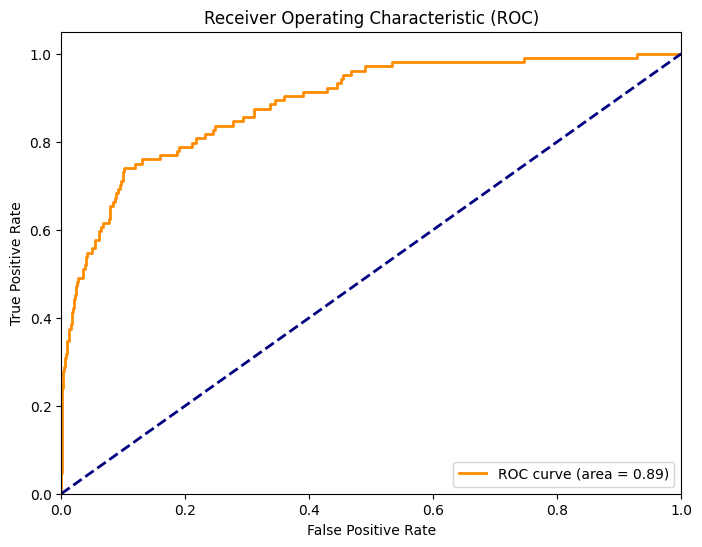

In [43]:
from sklearn.metrics import roc_curve, auc

# Calcular la tasa de verdaderos positivos y la tasa de falsos positivos
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calcular el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

Para poder determinar qué threshold necesitamos usar, busco el valor para el que los true positive rates sea del 93%, dado que el Error de Tipo I que el modelo tendrá es del 7%.

In [47]:
tpr

array([0.        , 0.00961538, 0.00961538, 0.01923077, 0.01923077,
       0.02884615, 0.02884615, 0.03846154, 0.03846154, 0.04807692,
       0.04807692, 0.06730769, 0.06730769, 0.07692308, 0.07692308,
       0.08653846, 0.08653846, 0.09615385, 0.09615385, 0.10576923,
       0.10576923, 0.11538462, 0.11538462, 0.125     , 0.125     ,
       0.14423077, 0.14423077, 0.15384615, 0.15384615, 0.17307692,
       0.17307692, 0.18269231, 0.18269231, 0.19230769, 0.19230769,
       0.20192308, 0.20192308, 0.21153846, 0.21153846, 0.22115385,
       0.22115385, 0.23076923, 0.23076923, 0.24038462, 0.24038462,
       0.25      , 0.25      , 0.25961538, 0.25961538, 0.26923077,
       0.26923077, 0.27884615, 0.27884615, 0.28846154, 0.28846154,
       0.29807692, 0.29807692, 0.30769231, 0.30769231, 0.31730769,
       0.31730769, 0.32692308, 0.32692308, 0.33653846, 0.33653846,
       0.34615385, 0.34615385, 0.35576923, 0.35576923, 0.36538462,
       0.36538462, 0.375     , 0.375     , 0.38461538, 0.38461

In [48]:
posicion = np.where(tpr.round(8) == 0.93269231)
print(posicion)

(array([311, 312, 313, 314, 315, 316], dtype=int64),)


Ahora, sabiendo qué posiciones son las que tienen un tpr aproximado del 93%, busco el valor de threshold que corresponde a esa posición

In [49]:
y_pred = y_probs>thresholds[311]

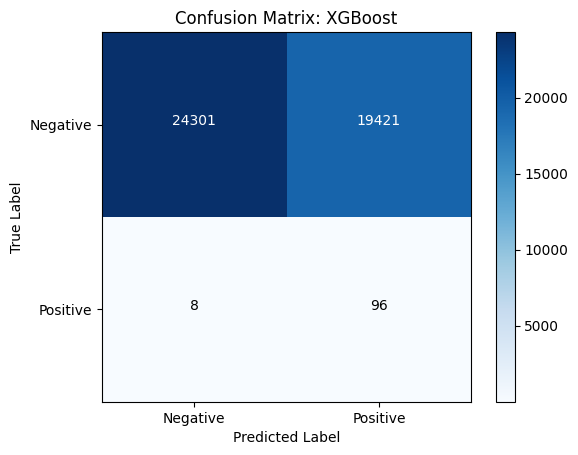

In [51]:
plot_confusion_matrix(xgb_model, X_test, y_test, 'XGBoost', y_pred=y_pred)
plt.show()